Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


<h2 style="text-align:center">Homes Sold in King County</h2>

<img src="kingcountymap.png" alt="Homes over $1M in King County" width="800" height="1600">

## Business Case and Methodology


Selling a home can be a difficult prospect for anyone,and in today's uncertain markets it has become an even scarier prospect. What we hope to achieve is giving the seller the piece of mind through factual, scientific data. We want to empower the seller to go out and seek the most for their real properties and homes through mathematical modeling and statistical learning.

### Framework


<img src="osemn.jpeg" alt="The OSEMN process" width="600" height="600">

Data Science Frameworks are an invaluable tool for the data science workflow. Workflow is a very common concern in many careers and especially in the programming and computer science fields. Workflows can make the difference in productivity and efficiency, and as the old adage goes 'Time is money'.

We have chosen to use, of the many excellent data science frameworks, the OSEMN framework. This provide us the baseline method for getting to our results, and a way to work through our peoject that provides us with a solid workflow. So what is the OSEMN framework? The handy infographic above lays out the high level view of the process, but we would like to break it down into it's constituent parts to give a more helpful overview. 

- **Obtain** - Source your data that you wish to operate and draw insight from. 
- **Scrub** - Work through your data to remove and fix any glaring issues that will effect modeling quality.
- **Explore** - Find connections and interesting pieces or insights within your data that can be modeled and observed.
- **Model** - Build your mathematical model, be it simple or complex, so that you can either predict future data with or draw inference from.
- **Interpret** - Interpretation is what all of the previous steps have led up to, what information can be drawn from your data to better help in the future.

The OSEMN framework will go a long way in insuring that we are on the right track and working towards a solution for our business case.

### Tools

We have a framework as a high level overview, but what are the actual tools that we use for the project?
* **Python** - A scripting language that has robust data science and data science adjacent tools.
* **Jupyter Notebook** - Much like a lab notebook in traditional sciences Jupyter Notebook will contain the information and documentation that will be presented in the future. 
* **Tableau Public** - Dashbord and Visulization building tools.

## Obtain

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

In [20]:
pd.set_option('display.max_columns',0)
pd.set_option('display.max_rows',0)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [21]:
priceFmt = mpl.ticker.StrMethodFormatter("${x:,.0f}")

def plot_data(X,y,xlabel,ylabel='Price'):
    """ Code courtesy of James Irving"""
    fig, ax = plt.subplots()
    
    ax.scatter(X,y,marker='.')
    
    ax.set(xlabel=xlabel,ylabel=ylabel)
    ax.set_title(f'{xlabel} vs {ylabel}')
    
    ax.yaxis.set_major_formatter(priceFmt)
    return fig,ax

In [22]:
warnings.filterwarnings('ignore')

In [23]:
plt.rcParams['figure.figsize'] = (15,10)

In [24]:
## Reading in data from CSV and create a copy to work on  
info = pd.read_csv('kc_house_data.csv')
data = info.copy()

In [25]:
## Cursory inspection of data
display(data.head(30))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [26]:
## Check data types and possible missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Initial Scrub and Explore


In [27]:
## Convert data to date-time object

data['date'] = pd.to_datetime(data['date'])

In [28]:
## Check for null values for cleaning up

print(data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [29]:
print('Data shape is: ', data.shape)

Data shape is:  (21597, 21)


### Dealing with View Nulls

#### Question 1: What are the pros and cons of the various ways to handle missing values within data?

Common methods of dealing with missing values: 
* Removal
* Imputing
* Categorization

1. **Removal** - Removing the data with missing values from the dataset as a whole.

   **Pros:** 
    * Creates a more accurate model. 
    * Does not introduce bias into the model.

   **Cons:** 
    * Loss of data.
    * Doesn't work correctly if there are a large amount of missing data, if you decide to only remove rows with missing values. 


2. **Imputing with descriptive stats** - Replacement of data with other descriptive stats, such as mean, median, or mode.
    
    **Pros:**
     * A solid approach for smaller datasets.
     * Help with data loss over removal.
     
   **Cons:** 
     * Imputing adds bias into our data if the information added isn't the actual accurate data.

3. **Categorizaton** - Turn a feature into a set of unique categories.

    **Pros**
      * Negates the loss of data.
      * Adds less variance.
      
   **Cons:**
      * Adds more features to encode which could lead to poor model performance.

Starting with the `View` column because it contains the least null values and therefore it is safe to just drop them all with no prior assumptions about the data.

In [30]:
## Checking view column data since it had the fewest null values
## Replace with the median of 0

print('View has',round(data['view'].isnull().sum()/len(data)*100,3),'% null values')
print('View median is:', data['view'].median())
data.view.value_counts()
data['view'] = data['view'].fillna(data['view'].median())
print('View now has',data['view'].isnull().sum(), 'null values')

View has 0.292 % null values
View median is: 0.0
View now has 0 null values


### Dealing with Waterfront Nulls

Looking now towards the `waterfront` column in our data we van see that there are clearly several missing datapoints that need to be addressed. Below we look at the data as a heatmap as plotted on a scatter plot. It is clear that the majority of the values of the data are not waterfront by looking at the points and comparing the two plots. Therefore we will fill the nulls values within waterfront as being 0, so not a `waterfront` property.

In [31]:
## Folium view of the null values in waterfront by lat and long
## the map was slow loading and cluttered, legacy code

# import folium

data['waterfront'] = data['waterfront'].fillna(2)
nullwf = data[data['waterfront'] == 2]
# nullwf['id'] = nullwf['id'].astype('str')
# lat = list(round(nullwf['lat'],3))
# long = list(round(nullwf['long'],3))
# latlong = list(zip(lat, long))

# m = folium.Map(location=[47.6848, -122.016],
#               zoom_start=10)

# # for lat in latlong:
# #     folium.Marker(lat)
    
# for i in range(0,len(nullwf)):
#     folium.Marker([nullwf.iloc[i]['lat'], nullwf.iloc[i]['long']]).add_to(m)

# m

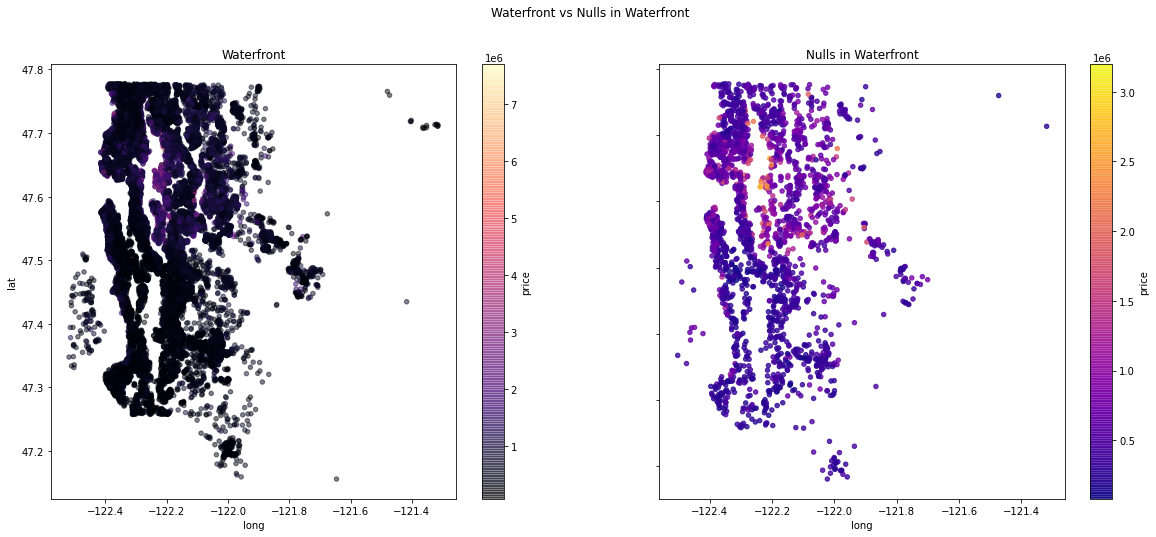

In [32]:
fig, axes = plt.subplots(ncols=2)

data.plot.scatter(x='long', y='lat', c='price', alpha=.5, figsize=(20,8), 
                  cmap='magma', sharey=True, sharex=False, ax=axes[0])
axes[0].set_title('Waterfront')

nullwf.plot.scatter(x='long', y='lat', c='price', alpha=.8, figsize=(20,8), 
                  cmap='plasma', sharey=True, sharex=False, ax=axes[1])
axes[1].set_title('Nulls in Waterfront')

plt.suptitle('Waterfront vs Nulls in Waterfront')
plt.show()

In [33]:
## Check waterfront for nulls and impute the median (0) of the column
## for missing values

print('Waterfront has', round((len(nullwf)/len(data))*100), '% missing values,')
print('Waterfront median:', data['waterfront'].median())

data['waterfront'] = data['waterfront'].replace(2, 1)
data.astype({'waterfront':'int64'}, copy=False)
print('Waterfront now has',data['waterfront'].isnull().sum(), 'null values')

Waterfront has 11 % missing values,
Waterfront median: 0.0
Waterfront now has 0 null values


### Dealing with Year Renovated nulls

 Taking a look at the nulls within the `yr_renovated`, it is impossible to inuit if a house has been renovated from the provided data. Therefore we will just fill the null values within the column with 0 to signify that this house has not been renovated.

In [34]:
## Checking yr_renovated for missing values and filling in

print('Year Renovated has',round(data['yr_renovated'].isnull().sum()/len(data)*100,3),'% null values')
data['yr_renovated'] = data['yr_renovated'].fillna(0)
print('Year Renovated mode:', data['waterfront'].mode())
print('Year Renovated now has',data['yr_renovated'].isnull().sum(), 'null values')

Year Renovated has 17.79 % null values
Year Renovated mode: 0    0.0
dtype: float64
Year Renovated now has 0 null values


Now we have dealt with the null values within the data set. It is time to turn our attention towards our data types to make sure that our data is in the correct type for further analysis and eventually modeling.

In [35]:
## Nulls imputed

print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### Datatype corrections


Looking forward into the further modeling it is important for our data to be in the correct types. There are several categorical types that are cast as `int` or `float`, and could be converted into a pandas `cat` objects for future use. 

Furthermore, if we take a look at `sqft_basement` we notice that it is cast as an object and is therefore a string. This data needs to be converted into an `int` or a `float` depending on the data. Given enough of the data is missing or zero it may be reasonable to drop the column.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [37]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.116775,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.321160,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
# Replace question marks in `sqft_basement` 

data['sqft_basement'] = data['sqft_basement'].replace('?',0.0)
data['sqft_basement'] = data['sqft_basement'].astype('float')
data['sqft_basement'] = data['sqft_basement'].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int32         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [39]:
## Turn basement into a categorical by converting it into a boolean column

basement = data.copy()
basement['sqft_basement'] = data['sqft_basement'].astype('bool')

In [40]:
data['sqft_basement'] = basement['sqft_basement']

In [41]:
data.drop('sqft_basement', axis=1, inplace=True)

Let's take a look at the categories that should be converted to categorical data types to better be fed into our model. 
* Waterfront - A boolean of is it waterfront or not, therefore categorical.
* Grade - A grade for the home that is given by an assessor for the county, not continuous and therefore categorical. 
* View - A rating of the view from 0 to 4, therefore categorical. 

Along these same lines we are going to convert the `yr_built` column into categorical variables by slicing them into bins of 1 decade (10 years) starting in 1900 and ending in 2020.

Considering the amount of non-renovated or houses with missing renovation data we have elected to drop the column because the few non-values will provide little to no meaningful data.

We are going to also look at binning the zipcode data to get general area vs price data as well.

In [42]:
## Cutting the years into bins for the cut method

decades = list(range(1899, 2020, 10))
lbls = ["1900","1910","1920","1930","1940","1950","1960","1970","1980",
          "1990", "2000","2010"]

## Cutting out the data into decades and dropping the aforementioned columns

data['decade_built'] = pd.cut(data['yr_built'],bins=decades,labels=lbls) 
print('Percentage of homes not renovated or without renovation data', 
      round(len(data[data['yr_renovated'] == 0])/len(data)*100,2),'%')
data.drop('yr_renovated', axis=1, inplace=True)
data.drop('yr_built', axis=1, inplace=True)

Percentage of homes not renovated or without renovation data 96.56 %


In [43]:
## Cutting the zipcode data into bins using the qcut method
## thus avoiding the need to use a continuous series of numbers

# zips = list(data['zipcode'].value_counts().index)
# data['zipcode'] = data['zipcode'].astype('int64')
# data['zips'] = pd.cut(data['zipcode'],bins=70,duplicates='drop',labels=False)  
# # data.drop('zipcode', axis=1, inplace=True)
# data.head()

In [44]:
## Sort by date to explore the date information further

data.sort_values(by='date', axis=0, inplace=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,decade_built
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,4,7,1450,98006,47.5746,-122.135,1260,8942,1950
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,98065,47.5150,-121.870,2380,5000,2010
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,1.0,0.0,4,7,1140,98052,47.6830,-122.114,2200,10500,1970
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,98106,47.5489,-122.363,1590,2306,2000
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0.0,0.0,4,9,1700,98117,47.6833,-122.400,2380,4750,1950
9578,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0.0,0.0,3,8,2820,98029,47.5794,-122.025,2820,48351,1970
11879,7305300695,2014-05-02,625000.0,4,2.50,2820,8408,2.0,0.0,0.0,3,9,2820,98155,47.7538,-122.325,1300,8408,2010
11895,3221059036,2014-05-02,400000.0,4,2.50,3630,42884,1.5,0.0,0.0,3,9,2300,98092,47.2617,-122.190,2830,80148,1970
4959,7525000080,2014-05-02,588500.0,3,1.75,2330,14892,1.0,0.0,0.0,3,8,1970,98074,47.6267,-122.046,2570,14217,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [45]:
## The data stretches 13 months acorss 2 years, from May 2014 to May 2015,
## So the months have been binned into 13 bins and labeled according to month

data['month_sold'] = pd.cut(data['date'],bins=13, labels=
                           range(1,14))
data['month_sold'].value_counts()


2     2286
3     2096
12    2084
4     1936
6     1806
1     1775
11    1758
5     1719
7     1530
10    1331
8     1322
9      991
13     963
Name: month_sold, dtype: int64

In [46]:
# ## Typing data as category objects in the dataframe, moved to a lower cell

# cat_cols = ['decade_built', 'waterfront', 'grade', 'view', 'condition', 'month_sold', 'zips']
# data[cat_cols] = data[cat_cols].astype('category')

### Correlation and Linearity

Now, we can take a further look at correlation amongst our columns to see if there are any obvious columns to drop as they do not pertain to the sales price of the houses.

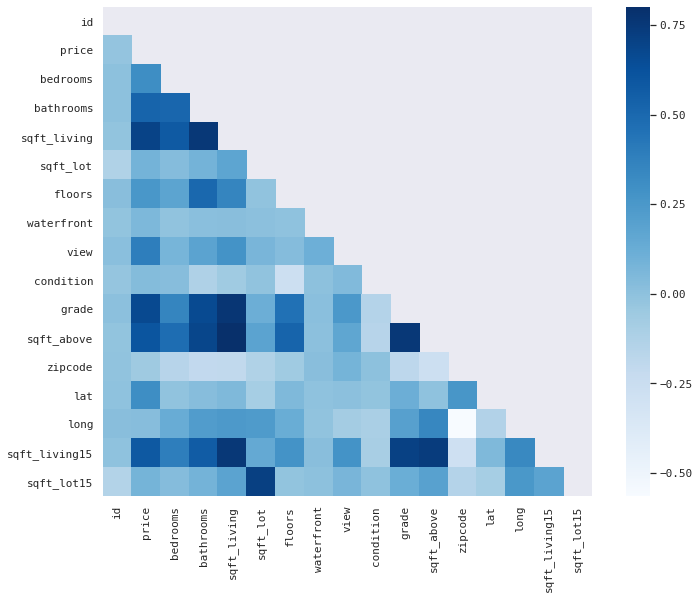

In [47]:
## Heatmap to see general correlation of all data to extract 
## data for further analysis

sns.set(context="notebook", font="monospace")
corrmat = data.corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, cmap='Blues');

Upon inspection a few elements can be seen to have no correlation to the price of the houses. Mainly we are looking at the `id` column. Next we can consider a couple more drops we could safely make, namely the `lat` and `long` columns as our area based predictions are being covered by our binned zipcodes. Therefore we are going to drop the `id`, `lat`, and `long` columns from our data so that we can further process it for modeling. 

Finally, our `date` data has been binned into `month_sold` and our original `date` `datetime` column can be dropped from the dataframe.

In [48]:
## Drop the aforementioned columns and check the dataframe

data.drop(labels=['id','lat','long', 'date'], axis=1, inplace=True)

In [49]:
from ipywidgets import interact

In [50]:
target=data['price']

def plot_col(df,col,target='price'):
    """Create a seaborn jointplot to show both linearity and distribution 
    df = Dataframe you are looking to operate on
    col = str or list: Column you wish to be the x axis
    target = string: Column you wish to be the Y axis in you graph, default: 'price'
    """
    
    plot = sns.jointplot(data=df, x=col, y=target, kind='reg')
    plt.suptitle(f"{col} vs {target}")
    return plot

In [51]:
## Separate categorical columns from the numerical and save the numerical

cat_cols = ['decade_built', 'waterfront', 'grade', 'view', 'condition', 'month_sold', 'zipcode']#,'sqft_basement']

num_cols = list(data.columns)
num_cols = [x for x in num_cols if x not in cat_cols]
num_cols.remove('price')

In [52]:
@interact
def show_plot(col=num_cols):
# for col in num_cols:
    plot_col(data,col)

interactive(children=(Dropdown(description='col', options=('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',…

Now we have a pretty good idea of what our data is looking like. It is important to note a couple of things though:

* A lot of the data does appear normal, which is good for our modeling assumptions.
* There seems to be a general linear relationship between price and our various columns. 

impactful things to note for modeling:
* There are numerous outliers that will effect our model drastically
* There are some remaining features that look conditional, or could be converted to conditional if the needed arises after modeling.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7316 to 16580
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21597 non-null  float64 
 1   bedrooms       21597 non-null  int64   
 2   bathrooms      21597 non-null  float64 
 3   sqft_living    21597 non-null  int64   
 4   sqft_lot       21597 non-null  int64   
 5   floors         21597 non-null  float64 
 6   waterfront     21597 non-null  float64 
 7   view           21597 non-null  float64 
 8   condition      21597 non-null  int64   
 9   grade          21597 non-null  int64   
 10  sqft_above     21597 non-null  int64   
 11  zipcode        21597 non-null  int64   
 12  sqft_living15  21597 non-null  int64   
 13  sqft_lot15     21597 non-null  int64   
 14  decade_built   21597 non-null  category
 15  month_sold     21597 non-null  category
dtypes: category(2), float64(5), int64(9)
memory usage: 2.5 MB


### Outlier Removal

In [54]:
from yellowbrick.regressor import cooks_distance
from yellowbrick.datasets import load_concrete

In [55]:
clean_data = data.copy()

In [56]:
clean_data['decade_built'] = clean_data['decade_built'].astype('int')
clean_data['month_sold'] = clean_data['month_sold'].astype('int')
# clean_data['sqft_basement'] = clean_data['sqft_basement'].astype('int')

In [57]:
y = clean_data.price
Xlist = list(clean_data.columns)
Xlist.remove('price')
X = clean_data[Xlist]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold
7316,4,1.00,1450,8800,1.0,0.0,0.0,4,7,1450,98006,1260,8942,1950,1
20586,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,98065,2380,5000,2010,1
1040,4,2.50,1940,10500,1.0,1.0,0.0,4,7,1140,98052,2200,10500,1970,1
20543,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,98106,1590,2306,2000,1
9587,3,2.50,2600,4750,1.0,0.0,0.0,4,9,1700,98117,2380,4750,1950,1
9578,5,2.50,2820,67518,2.0,0.0,0.0,3,8,2820,98029,2820,48351,1970,1
11879,4,2.50,2820,8408,2.0,0.0,0.0,3,9,2820,98155,1300,8408,2010,1
11895,4,2.50,3630,42884,1.5,0.0,0.0,3,9,2300,98092,2830,80148,1970,1
4959,3,1.75,2330,14892,1.0,0.0,0.0,3,8,1970,98074,2570,14217,1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


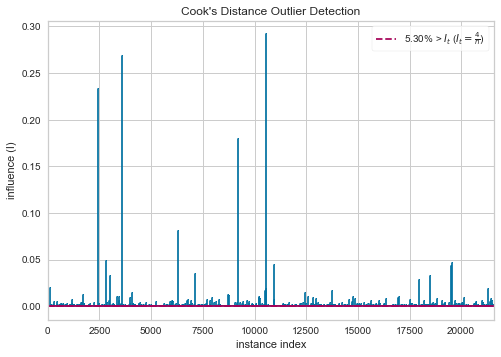

In [58]:
cd = cooks_distance(
    X, y,
    draw_threshold=True,
    linefmt="C0-", markerfmt=","
)

In [59]:
distance = pd.DataFrame(cd.distance_, columns=['distance'])
display(distance)
clean_data['distance'] = distance['distance']

,distance
7316,1.553895e-05
20586,1.878465e-06
1040,2.096332e-05
20543,1.254515e-07
9587,2.916950e-06
9578,3.693643e-06
11879,1.201114e-07
11895,3.081002e-04
4959,2.059651e-06
...,...


In [60]:
clean_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold,distance
7316,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,4,7,1450,98006,1260,8942,1950,1,1.553895e-05
20586,555000.0,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,98065,2380,5000,2010,1,1.878465e-06
1040,550000.0,4,2.50,1940,10500,1.0,1.0,0.0,4,7,1140,98052,2200,10500,1970,1,2.096332e-05
20543,295000.0,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,98106,1590,2306,2000,1,1.254515e-07
9587,790000.0,3,2.50,2600,4750,1.0,0.0,0.0,4,9,1700,98117,2380,4750,1950,1,2.916950e-06
9578,675000.0,5,2.50,2820,67518,2.0,0.0,0.0,3,8,2820,98029,2820,48351,1970,1,3.693643e-06
11879,625000.0,4,2.50,2820,8408,2.0,0.0,0.0,3,9,2820,98155,1300,8408,2010,1,1.201114e-07
11895,400000.0,4,2.50,3630,42884,1.5,0.0,0.0,3,9,2300,98092,2830,80148,1970,1,3.081002e-04
4959,588500.0,3,1.75,2330,14892,1.0,0.0,0.0,3,8,1970,98074,2570,14217,1980,1,2.059651e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [61]:
cdthreshold = 4/len(data)

In [62]:
clean_data = clean_data[clean_data['distance'] < cdthreshold]

In [63]:
clean_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold,distance
7316,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,4,7,1450,98006,1260,8942,1950,1,1.553895e-05
20586,555000.0,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,98065,2380,5000,2010,1,1.878465e-06
1040,550000.0,4,2.50,1940,10500,1.0,1.0,0.0,4,7,1140,98052,2200,10500,1970,1,2.096332e-05
20543,295000.0,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,98106,1590,2306,2000,1,1.254515e-07
9587,790000.0,3,2.50,2600,4750,1.0,0.0,0.0,4,9,1700,98117,2380,4750,1950,1,2.916950e-06
9578,675000.0,5,2.50,2820,67518,2.0,0.0,0.0,3,8,2820,98029,2820,48351,1970,1,3.693643e-06
11879,625000.0,4,2.50,2820,8408,2.0,0.0,0.0,3,9,2820,98155,1300,8408,2010,1,1.201114e-07
4959,588500.0,3,1.75,2330,14892,1.0,0.0,0.0,3,8,1970,98074,2570,14217,1980,1,2.059651e-06
3719,463000.0,3,1.75,1710,7320,1.0,0.0,0.0,3,7,1710,98155,2260,8839,1940,1,2.371122e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [64]:
display(clean_data.describe())
clean_data.info()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold,distance
count,2.045300e+04,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,2.045300e+04
mean,4.972087e+05,3.340195,2.067032,1997.244414,13146.982448,1.482130,0.111133,0.170586,3.409280,7.573608,1726.280203,98078.582897,1942.309099,11605.210971,1966.197624,6.478854,1.822073e-05
std,2.499003e+05,0.881746,0.719050,805.389641,29214.563427,0.538091,0.314304,0.635657,0.646604,1.084455,752.303693,53.276021,645.677688,21910.126954,29.258044,3.765094,3.039050e-05
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,98001.000000,399.000000,651.000000,1900.000000,1.000000,5.362469e-13
25%,3.155000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,98033.000000,1470.000000,5040.000000,1950.000000,3.000000,1.245069e-06
50%,4.400000e+05,3.000000,2.250000,1870.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,98070.000000,1810.000000,7519.000000,1970.000000,6.000000,5.741900e-06
75%,6.190000e+05,4.000000,2.500000,2450.000000,10246.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,98118.000000,2300.000000,9827.000000,1990.000000,10.000000,1.999733e-05
max,2.000000e+06,11.000000,5.750000,7730.000000,982998.000000,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,98199.000000,5790.000000,560617.000000,2010.000000,13.000000,1.848305e-04


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 7316 to 16580
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20453 non-null  float64
 1   bedrooms       20453 non-null  int64  
 2   bathrooms      20453 non-null  float64
 3   sqft_living    20453 non-null  int64  
 4   sqft_lot       20453 non-null  int64  
 5   floors         20453 non-null  float64
 6   waterfront     20453 non-null  float64
 7   view           20453 non-null  float64
 8   condition      20453 non-null  int64  
 9   grade          20453 non-null  int64  
 10  sqft_above     20453 non-null  int64  
 11  zipcode        20453 non-null  int64  
 12  sqft_living15  20453 non-null  int64  
 13  sqft_lot15     20453 non-null  int64  
 14  decade_built   20453 non-null  int32  
 15  month_sold     20453 non-null  int32  
 16  distance       20453 non-null  float64
dtypes: float64(6), int32(2), int64(9)
memory usage:

#### Question 2: What is Cook's Distance?

Cook's Distance, or more commonly among statisticians and quants Cook's D, is a Regressional Analysis method on predictor values. 

<img src="cooks-d.png" alt="Cook's Distance formula">

Cook's Distance returns the weight of data within predictor values. This allows the setting of a threshold at which to drop certain values that are too weighty/influential. Our threshold is set as $D_i = 4/n$ where **n** is the total number of observations. Anything over that threshold we deem too influential and drop from the data.

In [65]:
@interact
def show_plot(col=num_cols):
# for col in num_cols:
    plot_col(clean_data,col)

interactive(children=(Dropdown(description='col', options=('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',…

 ## Modeling
 

In [66]:
from makemode import *

In [67]:
y = clean_data.price
Xlist = list(clean_data.columns)
Xlist.remove('price')
X = clean_data[Xlist]

In [68]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
score = lasso.score(X,y)
importance = np.abs(lasso.coef_)
feature = pd.DataFrame(zip(X.columns, importance), columns=['name','coeff'])
feature

,name,coeff
0,bedrooms,0.000000
1,bathrooms,0.000000
2,sqft_living,178.707526
3,sqft_lot,0.119857
4,floors,0.000000
5,waterfront,0.000000
6,view,0.000000
7,condition,0.000000
8,grade,0.000000
9,sqft_above,6.878699


In [69]:
feature = feature[feature['coeff'] > 0]
featlst = list(feature.name)
featlst.append('price')
featlst.remove('sqft_lot')

In [70]:
new_data = clean_data[featlst]

In [71]:
new_data = clean_data

In [72]:
cat_cols = ['zipcode', 'decade_built', 'month_sold','waterfront', 'grade', 'view', 'condition', 'floors',
            'bedrooms', 'bathrooms']

### One-Hot Encoding

#### Question 3: What is One-Hot Encoding and why is it important?

One-Hot encoding is a concept in machine learning that is borrowed from electrical engineering and circuitry. One-Hot represents a group of legal combinations of a value that are filled with all `0` except the valid category, or High 1, which is represented as a `1` in the data.

This is an important concept as it allows data sciences to take data that is going to be fed into a machine learning model and let it know that a series of numbers or words are not any more important than any other series of numbers or words within the data.

In [73]:
## One-Hot encode all the categorical columns for modeling

ohe_clean_data = pd.get_dummies(data=clean_data, columns=cat_cols, drop_first=True)

In [74]:
## Sanity check the OHE

ohe_clean_data

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,distance,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,...,condition_2,condition_3,condition_4,condition_5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75
7316,435000.0,1450,8800,1450,1260,8942,1.553895e-05,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20586,555000.0,3310,6500,3310,2380,5000,1.878465e-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1040,550000.0,1940,10500,1140,2200,10500,2.096332e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20543,295000.0,1630,1368,1280,1590,2306,1.254515e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9587,790000.0,2600,4750,1700,2380,4750,2.916950e-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9578,675000.0,2820,67518,2820,2820,48351,3.693643e-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11879,625000.0,2820,8408,2820,1300,8408,1.201114e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4959,588500.0,2330,14892,1970,2570,14217,2.059651e-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3719,463000.0,1710,7320,1710,2260,8839,2.371122e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Model - Basic Model

In [75]:
def clean_columns(data):
#     data = data.replace('_', '') 
    data = data.replace(',', '') 
    data = data.replace("'", '')
    data = data.replace(' ', '_')
    data = data.replace('_', '')
    data = data.replace(']', '')
    data = data.replace('(', '')
    data = data.replace('.', '')
    return data

In [76]:
## Creating the framework for the formula to feed into statsmodels

cat_predictors = list(ohe_clean_data.columns)
cat_predictors = [clean_columns(x) for x in cat_predictors] 
ohe_clean_data.columns = cat_predictors
cat_predictors.remove('price')

In [77]:
clean_num_cols = ['sqftliving', 'sqftabove', 'sqftliving15', 'sqftlot15', 'sqftbasement', 'monthsold']
cat_predictors = [x for x in cat_predictors if x not in clean_num_cols]
cat_predictors = ' + '.join(cat_predictors)

In [78]:
num_predictors = ' + '.join(clean_num_cols)
predictors = num_predictors + ' + ' + cat_predictors

In [79]:
target = 'price'
formula = target + ' ~ ' + predictors 
formula

'price ~ sqftliving + sqftabove + sqftliving15 + sqftlot15 + sqftbasement + monthsold + sqftlot + distance + zipcode98002 + zipcode98003 + zipcode98004 + zipcode98005 + zipcode98006 + zipcode98007 + zipcode98008 + zipcode98010 + zipcode98011 + zipcode98014 + zipcode98019 + zipcode98022 + zipcode98023 + zipcode98024 + zipcode98027 + zipcode98028 + zipcode98029 + zipcode98030 + zipcode98031 + zipcode98032 + zipcode98033 + zipcode98034 + zipcode98038 + zipcode98039 + zipcode98040 + zipcode98042 + zipcode98045 + zipcode98052 + zipcode98053 + zipcode98055 + zipcode98056 + zipcode98058 + zipcode98059 + zipcode98065 + zipcode98070 + zipcode98072 + zipcode98074 + zipcode98075 + zipcode98077 + zipcode98092 + zipcode98102 + zipcode98103 + zipcode98105 + zipcode98106 + zipcode98107 + zipcode98108 + zipcode98109 + zipcode98112 + zipcode98115 + zipcode98116 + zipcode98117 + zipcode98118 + zipcode98119 + zipcode98122 + zipcode98125 + zipcode98126 + zipcode98133 + zipcode98136 + zipcode98144 + zipcod

In [80]:
ols_data = ohe_clean_data.copy()
ols_data.drop('distance', axis=1, inplace=True)

In [81]:
ols_data.describe()

,price,sqftliving,sqftlot,sqftabove,sqftliving15,sqftlot15,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,...,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,floors35,bedrooms2,bedrooms3,bedrooms4,bedrooms5,bedrooms6,bedrooms7,bedrooms8,bedrooms9,bedrooms10,bedrooms11,bathrooms075,bathrooms10,bathrooms125,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms275,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45,bathrooms475,bathrooms50,bathrooms525,bathrooms55,bathrooms575
count,2.045300e+04,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,...,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000
mean,4.972087e+05,1997.244414,13146.982448,1726.280203,1942.309099,11605.210971,0.009534,0.012761,0.008263,0.007823,0.022784,0.006894,0.013299,0.004547,0.009338,0.005085,0.008752,0.009827,0.022931,0.003520,0.019459,0.013543,0.015450,0.012419,0.013054,0.005916,0.019215,0.025913,0.028113,0.000391,0.010756,0.025913,0.010170,0.027624,0.018970,0.012810,0.019361,0.021659,0.022295,0.014228,...,0.007823,0.649538,0.264264,0.077397,0.088251,0.372170,0.005720,0.028260,0.000293,0.132059,0.465262,0.313793,0.067423,0.010463,0.001418,0.000391,0.000147,0.000147,0.000049,0.003080,0.185547,0.000342,0.069770,0.145455,0.092114,0.096563,0.253117,0.053977,0.032954,0.022735,0.028847,0.005183,0.004303,0.001858,0.002787,0.000293,0.000538,0.000196,0.000098,0.000049
std,2.499003e+05,805.389641,29214.563427,752.303693,645.677688,21910.126954,0.097178,0.112244,0.090526,0.088102,0.149218,0.082745,0.114554,0.067280,0.096186,0.071128,0.093143,0.098647,0.149686,0.059229,0.138136,0.115588,0.123337,0.110748,0.113510,0.076690,0.137283,0.158880,0.165300,0.019774,0.103156,0.158880,0.100333,0.163898,0.136423,0.112456,0.137795,0.145572,0.147645,0.118431,...,0.088102,0.477126,0.440952,0.267227,0.283667,0.483395,0.075419,0.165719,0.017126,0.338563,0.498804,0.464045,0.250759,0.101755,0.037629,0.019774,0.012110,0.012110,0.006992,0.055416,0.388750,0.018497,0.254765,0.352568,0.289193,0.295369,0.434808,0.225979,0.178520,0.149061,0.167379,0.071805,0.065454,0.043065,0.052719,0.017126,0.023185,0.013984,0.009888,0.006992
min,7.800000e+04,370.000000,520.000000,370.000000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     946.1
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:48:38   Log-Likelihood:            -2.6192e+05
No. Observations:               20453   AIC:                         5.241e+05
Df Residuals:                   20301   BIC:                         5.253e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.762e+05   5.33e+04     -3.305      0.001   -2.81e+05   -7.17e+04
sqftliving         95.2541      2.234     42.633      0.000      90.875      99.633
sqftlot             0.4152      0.034     12.160      0.000       0.348       0.482
sqftabove          30.6017      2.328     13.148      0.000      26.040      35.164
sqftliving15       21.1111      1.804     11.702      0.000      17.575      24.647
sqftlot15          -0.1763      0.047     -3.785      0.000      -0.268      -0.085
zipcode98002     1551.5471   7958.497      0.195      0.845    -1.4e+04    1.72e+04
zipcode98003     2005.4703   7260.518      0.276      0.782   -1.22e+04    1.62e+04
zipcode98004     5.173e+05   8445.050     61.252      0.000    5.01e+05    5.34e+05
zipcode98005     3.216e+05   8593.478     37.420      0.000    3.05e+05    3.38e+05
zipcode98006     2.546e+05   6447.345     39.490      0.000    2.42e+05    2.67e+05
zipcode98007      2.53e+05   8918.607     28.364      0.000    2.35e+05     2.7e+05
zipcode98008     2.386e+05   7253.101     32.890      0.000    2.24e+05    2.53e+05
zipcode98010     7.368e+04   1.04e+04      7.081      0.000    5.33e+04    9.41e+04
zipcode98011     1.403e+05   7999.472     17.537      0.000    1.25e+05    1.56e+05
zipcode98014     1.058e+05   9995.037     10.581      0.000    8.62e+04    1.25e+05
zipcode98019     9.348e+04   8188.879     11.416      0.000    7.74e+04     1.1e+05
zipcode98022    -4968.2193   7973.530     -0.623      0.533   -2.06e+04    1.07e+04
zipcode98023    -1.569e+04   6287.558     -2.495      0.013    -2.8e+04   -3363.638
zipcode98024     1.334e+05   1.16e+04     11.456      0.000    1.11e+05    1.56e+05
zipcode98027     1.744e+05   6573.447     26.538      0.000    1.62e+05    1.87e+05
zipcode98028     1.279e+05   7146.768     17.898      0.000    1.14e+05    1.42e+05
zipcode98029     2.128e+05   6960.725     30.578      0.000    1.99e+05    2.26e+05
zipcode98030      320.7031   7304.994      0.044      0.965    -1.4e+04    1.46e+04
zipcode98031     1.533e+04   7216.477      2.124      0.034    1182.924    2.95e+04
zipcode98032      317.6689   9372.380      0.034      0.973   -1.81e+04    1.87e+04
zipcode98033     3.203e+05   6547.527     48.919      0.000    3.07e+05    3.33e+05
zipcode98034     1.877e+05   6139.100     30.580      0.000    1.76e+05       2e+05
zipcode98038     3.571e+04   6051.565      5.900      0.000    2.38e+04    4.76e+04
zipcode98039     6.655e+05   3.17e+04     20.981      0.000    6.03e+05    7.28e+05
zipcode98040     4.262e+05   7854.105     54.260      0.000    4.11e+05    4.42e+05
zipcode98042     7807.6064   6108.243      1.278      0.201   -4165.043    1.98e+04
zipcode98045     1.033e+05   7800.109     13.240      0.000     8.8e+04    1.19e+05
zipcode98052     2.402e+05   6092.198     39.419      0.000

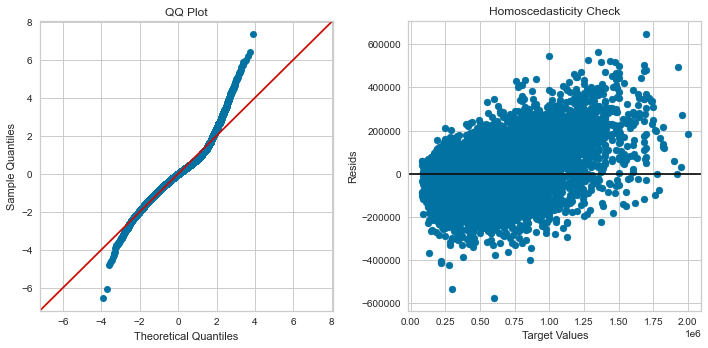

In [82]:
model = make_model(ols_data)

### Min-Max Scaling for Feature Selection

In [83]:
params = list(model.params.index)
# params.append('price')
params.remove('Intercept')
params = params[0:5]
params.append('price')

In [84]:
params

['sqftliving', 'sqftlot', 'sqftabove', 'sqftliving15', 'sqftlot15', 'price']

In [85]:
for param in params: 
    minn = ols_data[param].min()
    maxx = ols_data[param].max()
    ols_data[param] = ols_data[param].apply(lambda x: (x-minn) / (maxx-minn))
    
ols_data

,price,sqftliving,sqftlot,sqftabove,sqftliving15,sqftlot15,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,...,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,floors35,bedrooms2,bedrooms3,bedrooms4,bedrooms5,bedrooms6,bedrooms7,bedrooms8,bedrooms9,bedrooms10,bedrooms11,bathrooms075,bathrooms10,bathrooms125,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms275,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45,bathrooms475,bathrooms50,bathrooms525,bathrooms55,bathrooms575
7316,0.185744,0.146739,0.008428,0.153191,0.159711,0.014806,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20586,0.248179,0.399457,0.006087,0.417021,0.367464,0.007767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1040,0.245578,0.213315,0.010158,0.109220,0.334075,0.017589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20543,0.112903,0.171196,0.000863,0.129078,0.220924,0.002956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9587,0.370447,0.302989,0.004305,0.188652,0.367464,0.007320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9578,0.310614,0.332880,0.068193,0.347518,0.449082,0.085184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11879,0.284599,0.332880,0.008029,0.347518,0.167130,0.013853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4959,0.265609,0.266304,0.014628,0.226950,0.402708,0.024226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3719,0.200312,0.182065,0.006921,0.190071,0.345205,0.014622,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Feature Selection

In [86]:
y = ols_data.price
Xlist = list(ols_data.columns)
Xlist.remove('price')
X = ols_data[Xlist]

In [87]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
score = lasso.score(X,y)
importance = np.abs(lasso.coef_)
feature = pd.DataFrame(zip(X.columns, importance), columns=['name','coeff'])
feature

,name,coeff
0,sqftliving,0.382313
1,sqftlot,0.132657
2,sqftabove,0.097683
3,sqftliving15,0.065345
4,sqftlot15,0.000000
5,zipcode98002,0.039122
6,zipcode98003,0.039612
7,zipcode98004,0.221841
8,zipcode98005,0.120438
...,...,...


In [88]:
feature = feature[feature['coeff'] > 0]
featlst = list(feature.name)

In [89]:
featlst.append('price')

In [90]:
lassodata = ols_data[featlst]

In [91]:
lassodata.drop(columns=['sqftabove','sqftliving15'], inplace=True)

In [92]:
lassodata

,sqftliving,sqftlot,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,zipcode98070,zipcode98072,zipcode98074,zipcode98075,...,grade5,grade6,grade7,grade9,grade10,grade11,grade12,grade13,view10,view20,view30,view40,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,bedrooms2,bedrooms3,bedrooms4,bedrooms6,bedrooms7,bathrooms075,bathrooms10,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45,price
7316,0.146739,0.008428,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.185744
20586,0.399457,0.006087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.248179
1040,0.213315,0.010158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.245578
20543,0.171196,0.000863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.112903
9587,0.302989,0.004305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.370447
9578,0.332880,0.068193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.310614
11879,0.332880,0.008029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.284599
4959,0.266304,0.014628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.265609
3719,0.182065,0.006921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.200312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


#### Model - Feature Selection

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1056.
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:49:00   Log-Likelihood:                 33787.
No. Observations:               20453   AIC:                        -6.731e+04
Df Residuals:                   20320   BIC:                        -6.625e+04
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0168      0.011     -1.471      0.141      -0.039       0.006
sqftliving          0.4687      0.006     75.830      0.000       0.457       0.481
sqftlot             0.1810      0.012     14.687      0.000       0.157       0.205
zipcode98002       -0.0004      0.004     -0.103      0.918      -0.009       0.008
zipcode98003        0.0009      0.004      0.241      0.809      -0.007       0.008
zipcode98004        0.2701      0.004     61.039      0.000       0.261       0.279
zipcode98005        0.1695      0.005     37.589      0.000       0.161       0.178
zipcode98006        0.1336      0.003     39.633      0.000       0.127       0.140
zipcode98007        0.1320      0.005     28.175      0.000       0.123       0.141
zipcode98008        0.1248      0.004     32.715      0.000       0.117       0.132
zipcode98010        0.0373      0.005      6.828      0.000       0.027       0.048
zipcode98011        0.0754      0.004     17.941      0.000       0.067       0.084
zipcode98014        0.0532      0.005     10.149      0.000       0.043       0.063
zipcode98019        0.0495      0.004     11.508      0.000       0.041       0.058
zipcode98022       -0.0027      0.004     -0.657      0.511      -0.011       0.005
zipcode98023       -0.0078      0.003     -2.350      0.019      -0.014      -0.001
zipcode98024        0.0685      0.006     11.240      0.000       0.057       0.080
zipcode98027        0.0897      0.003     26.051      0.000       0.083       0.096
zipcode98028        0.0670      0.004     17.845      0.000       0.060       0.074
zipcode98029        0.1105      0.004     30.211      0.000       0.103       0.118
zipcode98030        0.0011      0.004      0.280      0.779      -0.006       0.009
zipcode98031        0.0086      0.004      2.274      0.023       0.001       0.016
zipcode98032       -0.0021      0.005     -0.430      0.667      -0.012       0.008
zipcode98033        0.1672      0.003     48.581      0.000       0.160       0.174
zipcode98034        0.0978      0.003     30.284      0.000       0.091       0.104
zipcode98038        0.0204      0.003      6.410      0.000       0.014       0.027
zipcode98039        0.3516      0.017     21.092      0.000       0.319       0.384
zipcode98040        0.2241      0.004     54.492      0.000       0.216       0.232
zipcode98042        0.0055      0.003      1.711      0.087      -0.001       0.012
zipcode98045        0.0534      0.004     13.016      0.000       0.045       0.061
zipcode98052        0.1272      0.003     39.766      0.000       0.121       0.133
zipcode98053        0.1235      0.003     35.461      0.000       0.117       0.130
zipcode98055        0.0174      0.004      4.564      0.000       0.010       0.025
zipcode98056        0.0450      0.003     13.100      0.000

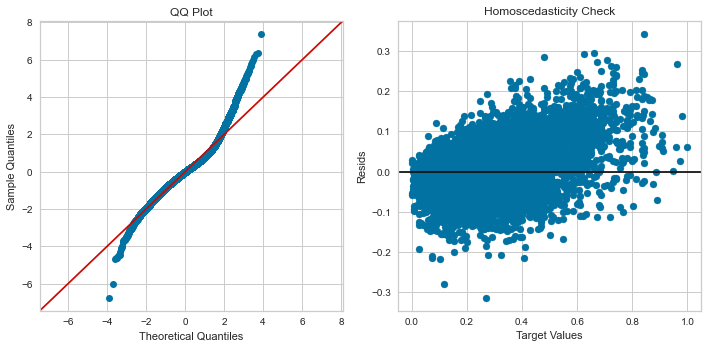

In [93]:
model = make_model(lassodata)

### Variable Influence Factor Testing

In [94]:
df = lassodata.copy()

In [95]:
df.corr().abs()

,sqftliving,sqftlot,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,zipcode98070,zipcode98072,zipcode98074,zipcode98075,...,grade5,grade6,grade7,grade9,grade10,grade11,grade12,grade13,view10,view20,view30,view40,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,bedrooms2,bedrooms3,bedrooms4,bedrooms6,bedrooms7,bathrooms075,bathrooms10,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45,price
sqftliving,1.000000,0.186029,0.048292,0.026216,0.032194,0.064129,0.144386,0.019119,0.007772,0.008721,0.028005,1.015337e-03,0.017468,0.036491,0.019005,0.017075,0.076461,0.013726,0.038261,0.006765,0.015547,0.030241,0.043357,0.012522,0.026640,0.002800,0.107666,0.014563,0.000661,0.074440,0.094304,0.033771,0.002325,0.000414,0.070382,0.072639,0.012688,0.049876,0.106866,0.156790,...,0.132720,0.332067,0.342624,0.362022,0.362798,0.291228,0.157595,0.025116,0.059567,0.112702,0.124908,0.074075,0.069776,0.109083,0.085817,0.026521,0.054900,0.439722,0.061526,0.066481,0.372522,0.262898,0.392893,0.130805,0.059420,0.075005,0.484730,0.156517,0.115465,0.085129,0.028068,0.251795,0.146171,0.192715,0.276702,0.141057,0.134553,0.133176,0.153248,0.695363
sqftlot,0.186029,1.000000,0.018967,0.010810,0.005899,0.017016,0.002265,0.007085,0.012366,0.080424,0.006079,9.783965e-02,0.057678,0.136852,0.017743,0.140914,0.068649,0.006475,0.025613,0.008359,0.008430,0.009307,0.014685,0.023035,0.039419,0.000908,0.001659,0.027798,0.077651,0.013063,0.075990,0.012017,0.019103,0.026669,0.005552,0.000845,0.160562,0.068507,0.003573,0.023674,...,0.002258,0.022769,0.061994,0.057279,0.088465,0.065862,0.049479,0.000061,0.003313,0.039415,0.060629,0.002414,0.034391,0.021342,0.025457,0.016647,0.004048,0.015287,0.002860,0.063176,0.046394,0.000176,0.030947,0.009256,0.001228,0.006145,0.054245,0.025590,0.009204,0.000720,0.007900,0.004317,0.012626,0.026195,0.026422,0.026789,0.011054,0.022691,0.011738,0.102560
zipcode98002,0.048292,0.018967,1.000000,0.011154,0.008955,0.008712,0.014981,0.008174,0.011390,0.006631,0.009526,7.013974e-03,0.009219,0.009774,0.015030,0.005831,0.013821,0.011496,0.012290,0.011002,0.011284,0.007569,0.013733,0.016002,0.016687,0.001941,0.010231,0.016002,0.009945,0.016537,0.013643,0.011176,0.013786,0.014598,0.014816,0.011787,0.006737,0.011326,0.014137,0.012699,...,0.047386,0.052229,0.036044,0.035196,0.020580,0.010623,0.004120,0.000686,0.011746,0.017300,0.012641,0.008319,0.008712,0.057641,0.056446,0.013006,0.000371,0.018291,0.007442,0.016731,0.010034,0.019442,0.011048,0.019580,0.003697,0.003626,0.025650,0.014605,0.003762,0.007025,0.001993,0.028186,0.007255,0.014964,0.016909,0.007081,0.006449,0.004233,0.005187,0.103825
zipcode98003,0.026216,0.010810,0.011154,1.000000,0.010378,0.010095,0.017360,0.009472,0.013199,0.007684,0.011038,8.127851e-03,0.010683,0.011326,0.017417,0.006757,0.016016,0.013321,0.014242,0.012749,0.013076,0.008771,0.015913,0.018543,0.019337,0.002249,0.011855,0.018543,0.011524,0.019163,0.015810,0.012951,0.015975,0.016916,0.017168,0.013659,0.007807,0.013125,0.016382,0.014715,...,0.012018,0.024310,0.029800,0.033933,0.015176,0.012310,0.004774,0.000795,0.004843,0.005142,0.011212,0.009640,0.005151,0.002309,0.018797,0.024779,0.024622,0.017245,0.008624,0.019388,0.025048,0.039794,0.013987,0.003129,0.004284,0.006320,0.004962,0.006481,0.002516,0.016507,0.010024,0.002942,0.006347,0.014419,0.016992,0.008206,0.007474,0.005210,0.006010,0.099847
zipcode98004,0.032194,0.005899,0.008955,0.010378,1.000000,0.008105,0.013938,0.007605,0.010597,0.006169,0.008862,6.525468e-03,0.

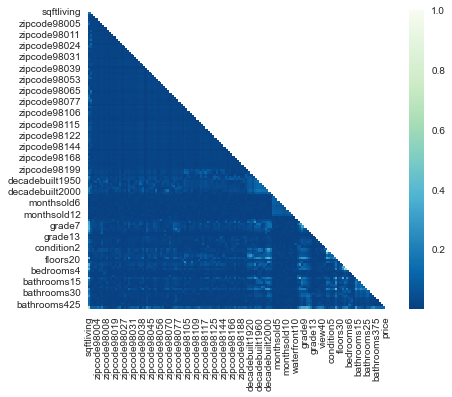

In [96]:
corrmat = df.corr()
corrmat = corrmat.abs()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
sns.heatmap(corrmat, mask=mask, square=True, cmap='GnBu_r');

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vifdf = df.drop(columns=['price'],axis=1)
vifdf = sm.add_constant(vifdf)

In [99]:
vifdf

,const,sqftliving,sqftlot,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,zipcode98070,zipcode98072,zipcode98074,...,waterfront10,grade5,grade6,grade7,grade9,grade10,grade11,grade12,grade13,view10,view20,view30,view40,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,bedrooms2,bedrooms3,bedrooms4,bedrooms6,bedrooms7,bathrooms075,bathrooms10,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45
7316,1.0,0.146739,0.008428,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
20586,1.0,0.399457,0.006087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1040,1.0,0.213315,0.010158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20543,1.0,0.171196,0.000863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9587,1.0,0.302989,0.004305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9578,1.0,0.332880,0.068193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11879,1.0,0.332880,0.008029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4959,1.0,0.266304,0.014628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3719,1.0,0.182065,0.006921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [100]:
from tqdm import tqdm_notebook as tqdm

In [101]:
vif = [variance_inflation_factor(vifdf.values, i) for i in tqdm(range(vifdf.shape[1]))]

In [102]:
vif_results = pd.Series(dict(zip(vifdf.columns, vif)))
vif_results

const           1229.518804
sqftliving         4.320229
sqftlot            1.268785
zipcode98002       1.559986
zipcode98003       1.734808
zipcode98004       1.515855
zipcode98005       1.491537
zipcode98006       2.390273
zipcode98007       1.420154
zipcode98008       1.802512
zipcode98010       1.274160
zipcode98011       1.542193
                   ...     
bathrooms15        2.586009
bathrooms175       3.775852
bathrooms20        2.796697
bathrooms225       2.695226
bathrooms25        4.498201
bathrooms30        1.568448
bathrooms325       1.449579
bathrooms35        1.601223
bathrooms375       1.130068
bathrooms40        1.125493
bathrooms425       1.075212
bathrooms45        1.121469
Length: 133, dtype: float64

In [103]:
threshold = 6
drop_vif = list(vif_results[vif_results>threshold].index)
if 'const' in drop_vif:
    drop_vif.remove('const')
drop_vif

['decadebuilt1960',
 'decadebuilt1990',
 'decadebuilt2000',
 'condition2',
 'condition3',
 'condition4',
 'condition5']

#### Model - VIF


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1063.
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:49:31   Log-Likelihood:                 33356.
No. Observations:               20453   AIC:                        -6.646e+04
Df Residuals:                   20327   BIC:                        -6.546e+04
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0041      0.004      1.078      0.281      -0.003       0.012
sqftliving          0.4851      0.006     77.484      0.000       0.473       0.497
sqftlot             0.1791      0.013     14.272      0.000       0.154       0.204
zipcode98002        0.0035      0.004      0.824      0.410      -0.005       0.012
zipcode98003        0.0018      0.004      0.467      0.640      -0.006       0.009
zipcode98004        0.2747      0.005     60.928      0.000       0.266       0.284
zipcode98005        0.1757      0.005     38.280      0.000       0.167       0.185
zipcode98006        0.1396      0.003     40.679      0.000       0.133       0.146
zipcode98007        0.1381      0.005     28.971      0.000       0.129       0.147
zipcode98008        0.1298      0.004     33.472      0.000       0.122       0.137
zipcode98010        0.0398      0.006      7.146      0.000       0.029       0.051
zipcode98011        0.0749      0.004     17.472      0.000       0.066       0.083
zipcode98014        0.0503      0.005      9.405      0.000       0.040       0.061
zipcode98019        0.0463      0.004     10.564      0.000       0.038       0.055
zipcode98022        0.0007      0.004      0.170      0.865      -0.008       0.009
zipcode98023       -0.0074      0.003     -2.181      0.029      -0.014      -0.001
zipcode98024        0.0686      0.006     11.030      0.000       0.056       0.081
zipcode98027        0.0918      0.004     26.135      0.000       0.085       0.099
zipcode98028        0.0673      0.004     17.557      0.000       0.060       0.075
zipcode98029        0.1116      0.004     29.875      0.000       0.104       0.119
zipcode98030        0.0007      0.004      0.184      0.854      -0.007       0.008
zipcode98031        0.0104      0.004      2.696      0.007       0.003       0.018
zipcode98032        0.0016      0.005      0.317      0.751      -0.008       0.011
zipcode98033        0.1709      0.004     48.681      0.000       0.164       0.178
zipcode98034        0.0988      0.003     30.029      0.000       0.092       0.105
zipcode98038        0.0188      0.003      5.806      0.000       0.012       0.025
zipcode98039        0.3587      0.017     21.080      0.000       0.325       0.392
zipcode98040        0.2333      0.004     55.964      0.000       0.225       0.241
zipcode98042        0.0079      0.003      2.400      0.016       0.001       0.014
zipcode98045        0.0510      0.004     12.215      0.000       0.043       0.059
zipcode98052        0.1288      0.003     39.455      0.000       0.122       0.135
zipcode98053        0.1202      0.004     33.918      0.000       0.113       0.127
zipcode98055        0.0187      0.004      4.808      0.000       0.011       0.026
zipcode98056        0.0505      0.004     14.415      0.000

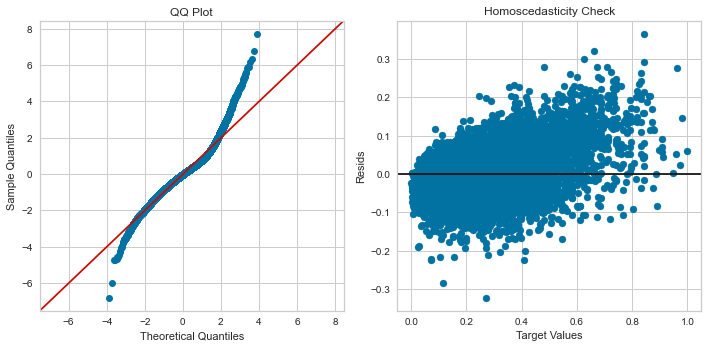

In [104]:
model = make_model(lassodata, drop_cols=[*drop_vif])

### Bad P-Value Extraction

In [105]:
pvalues = model.pvalues[1:].rename('p-values')
pvalues.sort_values(ascending=False,inplace=True)
pvalues

bathrooms30        0.929604
monthsold5         0.912251
zipcode98022       0.865055
zipcode98030       0.853978
zipcode98032       0.751178
monthsold7         0.709546
zipcode98003       0.640428
monthsold6         0.421392
zipcode98002       0.410034
monthsold3         0.236115
monthsold9         0.136886
decadebuilt1980    0.073772
                     ...   
zipcode98105       0.000000
zipcode98109       0.000000
zipcode98112       0.000000
zipcode98115       0.000000
zipcode98117       0.000000
zipcode98119       0.000000
zipcode98122       0.000000
zipcode98199       0.000000
view40             0.000000
grade11            0.000000
grade10            0.000000
sqftliving         0.000000
Name: p-values, Length: 125, dtype: float64

In [106]:
pvalues[pvalues > .05]

bathrooms30        0.929604
monthsold5         0.912251
zipcode98022       0.865055
zipcode98030       0.853978
zipcode98032       0.751178
monthsold7         0.709546
zipcode98003       0.640428
monthsold6         0.421392
zipcode98002       0.410034
monthsold3         0.236115
monthsold9         0.136886
decadebuilt1980    0.073772
waterfront10       0.068106
zipcode98092       0.065047
Name: p-values, dtype: float64

In [107]:
bcoeffs = list(pvalues[pvalues > .05].index)

In [108]:
bcoeffs

['bathrooms30',
 'monthsold5',
 'zipcode98022',
 'zipcode98030',
 'zipcode98032',
 'monthsold7',
 'zipcode98003',
 'monthsold6',
 'zipcode98002',
 'monthsold3',
 'monthsold9',
 'decadebuilt1980',
 'waterfront10',
 'zipcode98092']

#### Model - Bad P-Values Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1196.
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:49:32   Log-Likelihood:                 33346.
No. Observations:               20453   AIC:                        -6.647e+04
Df Residuals:                   20341   BIC:                        -6.558e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0047      0.003      1.627      0.104      -0.001       0.010
sqftliving          0.4846      0.006     77.490      0.000       0.472       0.497
sqftlot             0.1781      0.012     14.373      0.000       0.154       0.202
zipcode98004        0.2750      0.004     70.580      0.000       0.267       0.283
zipcode98005        0.1759      0.004     44.093      0.000       0.168       0.184
zipcode98006        0.1401      0.003     54.452      0.000       0.135       0.145
zipcode98007        0.1387      0.004     33.069      0.000       0.130       0.147
zipcode98008        0.1297      0.003     41.313      0.000       0.124       0.136
zipcode98010        0.0401      0.005      7.888      0.000       0.030       0.050
zipcode98011        0.0753      0.004     20.685      0.000       0.068       0.082
zipcode98014        0.0508      0.005     10.516      0.000       0.041       0.060
zipcode98019        0.0467      0.004     12.460      0.000       0.039       0.054
zipcode98023       -0.0067      0.002     -2.695      0.007      -0.012      -0.002
zipcode98024        0.0690      0.006     11.928      0.000       0.058       0.080
zipcode98027        0.0923      0.003     34.410      0.000       0.087       0.098
zipcode98028        0.0677      0.003     21.884      0.000       0.062       0.074
zipcode98029        0.1122      0.003     37.817      0.000       0.106       0.118
zipcode98031        0.0109      0.003      3.475      0.001       0.005       0.017
zipcode98033        0.1714      0.003     63.887      0.000       0.166       0.177
zipcode98034        0.0992      0.002     41.446      0.000       0.095       0.104
zipcode98038        0.0190      0.002      8.221      0.000       0.015       0.024
zipcode98039        0.3581      0.017     21.238      0.000       0.325       0.391
zipcode98040        0.2337      0.003     66.853      0.000       0.227       0.241
zipcode98042        0.0082      0.002      3.460      0.001       0.004       0.013
zipcode98045        0.0516      0.004     14.732      0.000       0.045       0.058
zipcode98052        0.1295      0.002     55.191      0.000       0.125       0.134
zipcode98053        0.1206      0.003     44.257      0.000       0.115       0.126
zipcode98055        0.0189      0.003      5.976      0.000       0.013       0.025
zipcode98056        0.0507      0.003     18.955      0.000       0.045       0.056
zipcode98058        0.0218      0.003      8.578      0.000       0.017       0.027
zipcode98059        0.0555      0.003     21.954      0.000       0.051       0.060
zipcode98065        0.0585      0.003     19.125      0.000       0.052       0.064
zipcode98070        0.0530      0.005     10.395      0.000       0.043       0.063
zipcode98072        0.0904      0.003     28.737      0.000

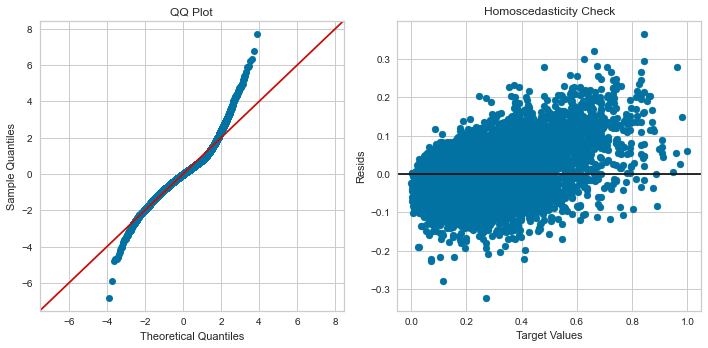

In [109]:
model =  make_model(lassodata, drop_cols=[*bcoeffs, *drop_vif])

### Model Validation

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [111]:
df_train, df_test = train_test_split(lassodata)
df_train.shape, df_test.shape

((15339, 133), (5114, 133))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     898.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:49:33   Log-Likelihood:                 25156.
No. Observations:               15339   AIC:                        -5.009e+04
Df Residuals:                   15227   BIC:                        -4.923e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0041      0.003      1.257      0.209      -0.002       0.011
sqftliving          0.4836      0.007     66.991      0.000       0.469       0.498
sqftlot             0.1736      0.014     12.494      0.000       0.146       0.201
zipcode98004        0.2767      0.004     62.243      0.000       0.268       0.285
zipcode98005        0.1749      0.005     37.864      0.000       0.166       0.184
zipcode98006        0.1422      0.003     48.055      0.000       0.136       0.148
zipcode98007        0.1389      0.005     30.397      0.000       0.130       0.148
zipcode98008        0.1294      0.004     35.402      0.000       0.122       0.137
zipcode98010        0.0409      0.006      7.084      0.000       0.030       0.052
zipcode98011        0.0763      0.004     18.670      0.000       0.068       0.084
zipcode98014        0.0531      0.006      9.658      0.000       0.042       0.064
zipcode98019        0.0467      0.004     11.243      0.000       0.039       0.055
zipcode98023       -0.0085      0.003     -2.988      0.003      -0.014      -0.003
zipcode98024        0.0729      0.007     10.602      0.000       0.059       0.086
zipcode98027        0.0928      0.003     30.254      0.000       0.087       0.099
zipcode98028        0.0677      0.004     18.893      0.000       0.061       0.075
zipcode98029        0.1127      0.003     33.277      0.000       0.106       0.119
zipcode98031        0.0106      0.004      2.938      0.003       0.004       0.018
zipcode98033        0.1748      0.003     57.182      0.000       0.169       0.181
zipcode98034        0.0984      0.003     35.671      0.000       0.093       0.104
zipcode98038        0.0200      0.003      7.573      0.000       0.015       0.025
zipcode98039        0.3470      0.019     17.969      0.000       0.309       0.385
zipcode98040        0.2364      0.004     57.961      0.000       0.228       0.244
zipcode98042        0.0093      0.003      3.463      0.001       0.004       0.015
zipcode98045        0.0535      0.004     13.441      0.000       0.046       0.061
zipcode98052        0.1293      0.003     48.319      0.000       0.124       0.135
zipcode98053        0.1218      0.003     39.349      0.000       0.116       0.128
zipcode98055        0.0189      0.004      5.305      0.000       0.012       0.026
zipcode98056        0.0524      0.003     17.328      0.000       0.047       0.058
zipcode98058        0.0238      0.003      8.226      0.000       0.018       0.030
zipcode98059        0.0558      0.003     19.237      0.000       0.050       0.061
zipcode98065        0.0592      0.004     16.633      0.000       0.052       0.066
zipcode98070        0.0521      0.006      8.717      0.000       0.040       0.064
zipcode98072        0.0935      0.004     26.127      0.000

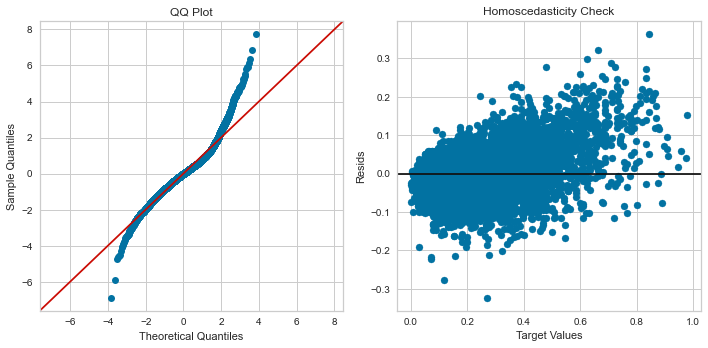

In [112]:
final_model = make_model(df_train,drop_cols=[*drop_vif,*bcoeffs])

In [113]:
r2dict = {}
r2scores = {}
for x in tqdm(range(0, 20)):
    df_train, df_test = train_test_split(lassodata)
    model = make_model(df_train,drop_cols=[*drop_vif,*bcoeffs], show_sum=False)
#     r2dict.update({model.rsquared:model})
    y_train = model.predict(df_train)
    y_test = model.predict(df_test)
    r2_train = r2_score(df_train['price'],y_train)
    r2_test = r2_score(df_test['price'],y_test)
    
    r2dict.update({r2_test:[r2_test, model]})
    
#     split.update({model.rsquared:[df_train, df_test]})

In [114]:
besttest = max(r2dict.items())

In [115]:
besttest[1]

[0.8693428257770596,

In [116]:
bestmodel = besttest[1][1]

In [117]:
df_train, df_test = train_test_split(lassodata)

In [118]:
y_train = bestmodel.predict(df_train)

In [119]:
y_test = bestmodel.predict(df_test)

In [120]:
r2_train = r2_score(df_train['price'],y_train)
r2_test = r2_score(df_test['price'],y_test)
print(f"Training Score: {r2_train}")
print(f"Test Score: {r2_test}")

Training Score: 0.8644672039956366
Test Score: 0.8730621548983991


In [121]:
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     885.3
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:49:50   Log-Likelihood:                 24979.
No. Observations:               15339   AIC:                        -4.973e+04
Df Residuals:                   15227   BIC:                        -4.888e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0035      0.003      1.061      0.289      -0.003       0.010
sqftliving          0.4812      0.007     66.437      0.000       0.467       0.495
sqftlot             0.1552      0.014     10.948      0.000       0.127       0.183
zipcode98004        0.2746      0.005     60.374      0.000       0.266       0.284
zipcode98005        0.1788      0.004     39.823      0.000       0.170       0.188
zipcode98006        0.1416      0.003     47.822      0.000       0.136       0.147
zipcode98007        0.1395      0.005     28.472      0.000       0.130       0.149
zipcode98008        0.1293      0.004     35.247      0.000       0.122       0.136
zipcode98010        0.0459      0.006      7.423      0.000       0.034       0.058
zipcode98011        0.0756      0.004     18.407      0.000       0.068       0.084
zipcode98014        0.0542      0.005      9.968      0.000       0.044       0.065
zipcode98019        0.0478      0.004     11.035      0.000       0.039       0.056
zipcode98023       -0.0060      0.003     -2.062      0.039      -0.012      -0.000
zipcode98024        0.0721      0.007     10.460      0.000       0.059       0.086
zipcode98027        0.0924      0.003     29.770      0.000       0.086       0.098
zipcode98028        0.0688      0.004     18.939      0.000       0.062       0.076
zipcode98029        0.1142      0.003     33.337      0.000       0.108       0.121
zipcode98031        0.0105      0.004      2.833      0.005       0.003       0.018
zipcode98033        0.1732      0.003     56.261      0.000       0.167       0.179
zipcode98034        0.0985      0.003     35.309      0.000       0.093       0.104
zipcode98038        0.0194      0.003      7.146      0.000       0.014       0.025
zipcode98039        0.3595      0.017     21.241      0.000       0.326       0.393
zipcode98040        0.2319      0.004     56.527      0.000       0.224       0.240
zipcode98042        0.0091      0.003      3.326      0.001       0.004       0.014
zipcode98045        0.0547      0.004     13.840      0.000       0.047       0.062
zipcode98052        0.1308      0.003     48.394      0.000       0.125       0.136
zipcode98053        0.1212      0.003     38.852      0.000       0.115       0.127
zipcode98055        0.0183      0.004      5.041      0.000       0.011       0.025
zipcode98056        0.0510      0.003     16.693      0.000       0.045       0.057
zipcode98058        0.0215      0.003      7.270      0.000       0.016       0.027
zipcode98059        0.0564      0.003     19.290      0.000       0.051       0.062
zipcode98065        0.0599      0.004     17.075      0.000       0.053       0.067
zipcode98070        0.0588      0.006      9.874      0.000       0.047       0.070
zipcode98072        0.0923      0.004     25.538      0.000

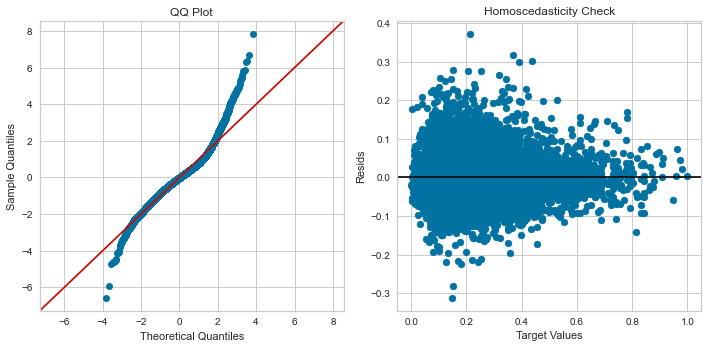

In [122]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
sm.graphics.qqplot(bestmodel.resid,fit=True, line='45',ax=ax[0])
ax[0].set_title('QQ Plot')
ax[1].scatter(x=df_train['price'],y=bestmodel.resid)
ax[1].axhline(0,color='k')
ax[1].set(ylabel='Resids',title='Homoscedasticity Check',
                      xlabel='Target Values')
plt.tight_layout()
plt.show()

#### Model Limitations

There are certain limitations with this model. These limitations will make it so that the model is not able to predict certain things. The only real major inability for prediction is that it will not fair well within price ranges about $1M. Due to limitations of data and our methodology our prediction strength is not the strongest, but our inference can provide serious insights into the most efficient aspects of our data to provide to future sellers. Therefore we have taken strides to provide inference based data to present in support of our business case. 

However this is not a major detriment as the majority of houses sold in the area are sold below the $1M mark as seen within this map:

<img src="Homes over $1M.png" alt="Homes over $1M in King County" width="800" height="1600">

This map reveals that a very small portion of our homes are sold at or above $1M.

<img src="Price of Home by Color.png" alt="Homes over $1M in King County" width="800" height="1600">

Total homes sold.

## Interpretations

### Statistical Inference

Statisical Inference helps us draw conclusions from data to help estimate the parameters of the population. We are going to give solid inferential advice to our client based on our statistical modeling and parameter inferences.

### Coefficients of our Parameters

In [124]:
final_coef = pd.DataFrame(final_model.params, columns=['coefficients'])

In [125]:
final_coef.drop('Intercept',axis=0, inplace=True)

In [126]:
final_coef.sort_values('coefficients', ascending=False).head(10)

,coefficients
grade13,0.510710
sqftliving,0.483577
zipcode98039,0.347017
grade12,0.284561
zipcode98004,0.276727
zipcode98112,0.246005
zipcode98040,0.236357
zipcode98109,0.218203
zipcode98102,0.210417
zipcode98119,0.209018


These are our top 10 most important parameters for a home according to our model. 

#### Grade vs. Price

We are going to take a look at the relationship that grades play in relation to our pricing data. A big question though is what do these grades mean, and for that information we go to the King County website to further investigate.

[King County Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

**Grading System**

* **1-3** Falls short of minimum building standards. Normally cabin or inferior structure.

* **4** Generally older, low quality construction. Does not meet code.

* **5** Low construction costs and workmanship. Small, simple design.

* **6** Lowest grade currently meeting building code. Low quality materials and simple designs.

* **7** Average grade of construction and design. Commonly seen in plats and older sub-divisions.

* **8** Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

* **9** Better architectural design with extra interior and exterior design and quality.

* **10** Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

* **11** Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

* **12** Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

* **13** Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [127]:
gradegrp = new_data.groupby('grade').mean()

In [128]:
gradegrp.index

Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64', name='grade')

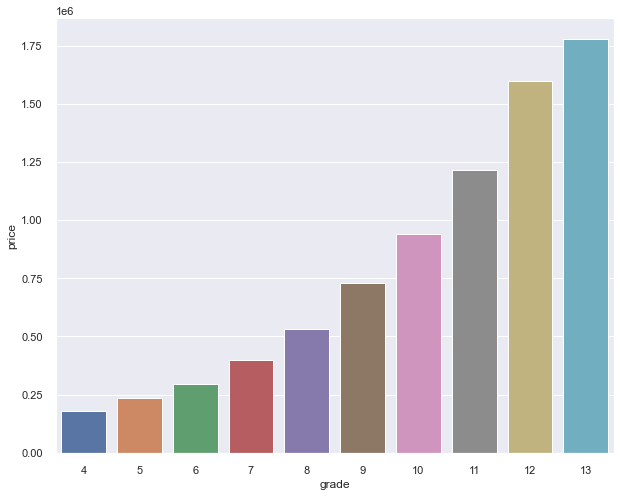

In [129]:
sns.set(rc={'figure.figsize':(10,8)})
g = sns.barplot(data=gradegrp, x=gradegrp.index, y='price')

The relationship between price and grade form a nearly exponential relationship with one another.

#### Zipcode vs. Price

In [143]:
zipgrp = new_data.groupby('zipcode').mean().sort_values('price')

In [144]:
zipgrp

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,decade_built,month_sold,distance
zipcode,,,,,,,,,,,,,,,,
98002,2.327619e+05,3.287179,1.798718,1600.825641,7499.317949,1.325641,0.102564,0.010256,3.743590,6.687179,1499.205128,1481.728205,7601.974359,1963.384615,6.784615,0.000016
98168,2.374130e+05,2.984848,1.401515,1440.984848,11272.723485,1.147727,0.140152,0.007576,3.238636,6.481061,1215.037879,1467.128788,9726.946970,1948.636364,6.204545,0.000012
98032,2.469672e+05,3.388430,1.690083,1681.528926,9622.446281,1.219008,0.082645,0.016529,3.628099,7.107438,1408.140496,1652.272727,9077.000000,1960.247934,6.561983,0.000020
98023,2.738140e+05,3.413646,2.020789,1897.332623,9763.360341,1.296375,0.104478,0.059701,3.402985,7.454158,1624.624733,1893.950959,9355.095949,1973.027719,6.669510,0.000026
98001,2.759145e+05,3.376068,2.000712,1862.914530,13911.470085,1.427350,0.088319,0.042735,3.333333,7.253561,1701.284900,1816.435897,11001.401709,1976.410256,6.490028,0.000017
98188,2.767121e+05,3.387597,1.773256,1702.302326,10015.682171,1.189922,0.124031,0.108527,3.325581,6.945736,1408.007752,1627.317829,9690.155039,1959.844961,6.883721,0.000016
98003,2.777458e+05,3.298851,1.984674,1811.536398,10369.352490,1.312261,0.076628,0.091954,3.371648,7.417625,1597.586207,1791.459770,9546.743295,1971.877395,6.716475,0.000020
98148,2.820498e+05,3.160714,1.808036,1622.678571,8982.517857,1.214286,0.107143,0.000000,3.107143,6.982143,1496.428571,1611.071429,8816.464286,1959.464286,6.321429,0.000010
98198,2.828954e+05,3.156250,1.724609,1636.894531,10123.417969,1.207031,0.152344,0.398438,3.445312,7.003906,1415.683594,1660.171875,8919.996094,1962.304688,6.652344,0.000024


<img src="zipcodemap.png" alt="Map of price average by zipcode">
<img src="download.png"" alt="Map of price average by zipcode">

It is clearly presented by this map that the homes surrounding the inner bay and the coastline are on average more valuable than those in more land-locked areas of the county.

#### Square Feet of Living space vs. Price

In [158]:
sqftgrp = new_data.groupby('sqft_living').mean()

In [159]:
sqftgrp

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold,distance
sqft_living,,,,,,,,,,,,,,,,
370,276000.0,1.0,0.750,1801.0,1.0,0.0,0.0,5.0,5.0,370.0,98117.0,1340.0,5000.0,1920.0,2.0,3.049137e-05
380,245000.0,1.0,0.750,15000.0,1.0,0.0,0.0,3.0,5.0,380.0,98168.0,1170.0,15000.0,1960.0,2.0,9.162950e-05
390,245000.0,1.0,1.000,2000.0,1.0,0.0,0.0,4.0,6.0,390.0,98103.0,1340.0,5100.0,1920.0,13.0,3.879839e-07
420,254525.0,1.0,0.875,5009.0,1.0,0.0,0.0,3.5,4.5,420.0,98122.0,1440.0,5847.5,1930.0,7.0,7.497701e-05
430,80000.0,1.0,0.750,5050.0,1.0,1.0,0.0,2.0,4.0,430.0,98014.0,1200.0,7500.0,1910.0,1.0,1.427512e-05
440,290000.0,2.0,0.750,8313.0,1.0,1.0,3.0,4.0,5.0,440.0,98070.0,880.0,26289.0,1940.0,6.0,1.132556e-05
460,247000.0,1.0,1.000,4120.0,1.0,0.0,0.0,3.0,4.0,460.0,98055.0,990.0,4120.0,1930.0,7.0,1.058437e-04
470,174250.0,1.0,0.875,39368.5,1.0,0.0,1.0,4.0,4.5,470.0,98018.0,1540.0,34631.0,1930.0,8.0,4.775978e-05
480,157500.0,1.0,0.875,7155.0,1.0,0.0,0.0,2.5,4.5,480.0,98105.5,1220.0,7363.5,1930.0,4.5,6.134117e-05


In [165]:
px.scatter(sqftgrp, x=sqftgrp.index, y='price', color='zipcode')